<a href="https://colab.research.google.com/github/Manikanta9391235355/G.Manikanta/blob/main/Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


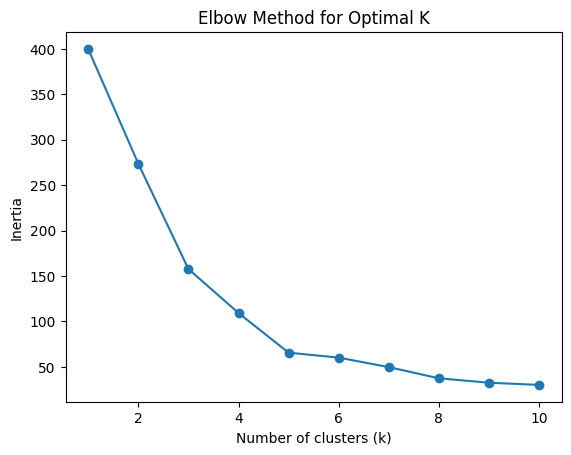

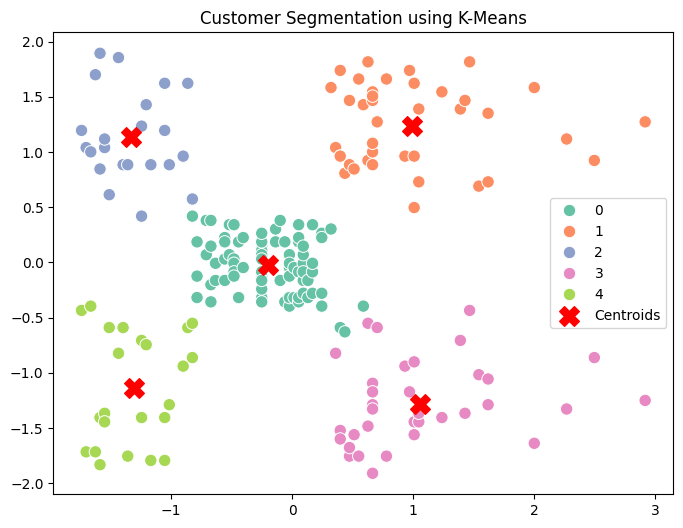

Silhouette Score: 0.5546571631111091


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

# Step 3: Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Step 5: Fit K-Means with optimal K (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = y_kmeans

# Step 6: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette="Set2", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

# Step 7: Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", score)
